In [2]:
import facebook
import requests
from collections import Counter

In [446]:
access_token = 'EAACEdEose0cBADIvtqXQoUpjvq7nwCrUIt9hXKluupLZBYzPBZAaVwOAYGwdNyLh81OSplSVCqZC7dMZCMA1QOQHmFzOflQQkZC27nuYP0ataAUFgKTyzYEnq1zKXFBKErcmVf8na9AO9nnDZB5ZBGJ8NQoAv8HNXOtNDJEaFiy7AZDZD'

In [187]:
graph = facebook.GraphAPI(access_token)

In [448]:
def get_posts(access_token,user):
    #user = 'Breitbart'
    #extra_posts
    graph = facebook.GraphAPI(access_token)
    profile = graph.get_object(user)
    
    posts = graph.get_connections(profile['id'],'posts')
    
        
    count = 0
    ids_comments_2 = []
    
    posts_50 = posts
    
    for p in range(3):
        try:
            more_posts = requests.get(posts_50['paging']['next']).json()    


            #posts_50 = {}
            posts_50['data'] = posts_50['data']+more_posts['data']
            posts_50['paging'] = more_posts['paging']
        except:
            pass
    
    posts_final = posts_50

    for x in range(len(posts_50['data'])):
        try:
            more_comments = requests.get(posts_50['data'][x]['comments']['paging']['next']).json()
            posts_final['data'][x]['comments']['data'] = posts_50['data'][x]['comments']['data']+more_comments['data']
            posts_final['data'][x]['comments']['paging'] = more_comments['paging']
    
        except:
            pass
        #for i in posts_50['data'][x]['comments']['data']:
        #    ids_comments_2.append(i['from']['id'])

        count += 1
        if count%10 == 0:
            print count
    return posts_final

In [ ]:
import pickle
News = ['Breitbart','TomiLahren','cnn','ConservativeNewsToday','FoxNews','HuffingtonPost','msnbc','nytimes','washingtonpost']
for x in News:
    data = get_posts(access_token,x)
    name = '%s_dict_2.p'%x
    pickle.dump( data, open( name, "wb" ) )

In [584]:
import pickle
Breitbart_dict = pickle.load( open("Breitbart_dict_2.p", "rb" ) )
NYT_dict = pickle.load( open("nytimes_dict_2.p", "rb" ) )
Fox_dict = pickle.load( open("FoxNews_dict_2.p", "rb" ) )
cnn_dict = pickle.load( open("cnn_dict_2.p", "rb" ) )
msnbc_dict = pickle.load( open("msnbc_dict_2.p", "rb" ) )
Tomi_dict = pickle.load( open("TomiLahren_dict_2.p", "rb" ) )
Huff_dict = pickle.load( open("HuffingtonPost_dict_2.p", "rb" ) )
Con_dict = pickle.load( open("ConservativeNewsToday_dict_2.p", "rb" ) )
WaP_dict = pickle.load( open("washingtonpost_dict_2.p", "rb" ) )

In [783]:
All_dict = {'Br':Breitbart_dict,'NYT': NYT_dict,'FOX': Fox_dict,'CNN':cnn_dict,'NBC': msnbc_dict, 'TOM':Tomi_dict, 'HUF':Huff_dict,'CON': Con_dict, 'WAP':WaP_dict}

In [585]:
#Finding users:
def Create_edges_from_dict(dictionary,node_prefix):
    count = 0
    users_id = []
    for x in dictionary['data']:
        #Finding user who have commented
        for i in x['comments']['data']:
            node_name = "%s%d"%(node_prefix,count)
            users_id.append((i['from']['id'],node_name))
            
        count +=1 
    return users_id

In [586]:
Breitbart_ids = Create_edges_from_dict(Breitbart_dict,'Br')

In [587]:
Nyt_ids = Create_edges_from_dict(NYT_dict,'NYT')
FoxNews_ids = Create_edges_from_dict(Fox_dict,'FOX')
CNN_ids = Create_edges_from_dict(cnn_dict,'CNN')
nbc_ids = Create_edges_from_dict(msnbc_dict,'NBC')
tom_ids = Create_edges_from_dict(Tomi_dict,'TOM')
Huff_ids = Create_edges_from_dict(Huff_dict,'HUF')
Con_ids = Create_edges_from_dict(Con_dict,'CON')
Wap_ids = Create_edges_from_dict(WaP_dict,'WAP')

In [588]:
All_ids = Breitbart_ids+Nyt_ids+FoxNews_ids+CNN_ids+nbc_ids+tom_ids+Huff_ids+Con_ids+Wap_ids

In [918]:
import networkx as nx
G = nx.Graph()

G.add_edges_from(All_ids)

In [919]:
Article_nodes = []
User_nodes = []
for x in G.nodes():
    if type(x) is str:
        #G[x]['Type'] =0
        Article_nodes.append(x)
    else:
        User_nodes.append(x)
        #G[x]['Type'] =1

In [920]:
nx.write_gexf(G,'social_network.gexf')

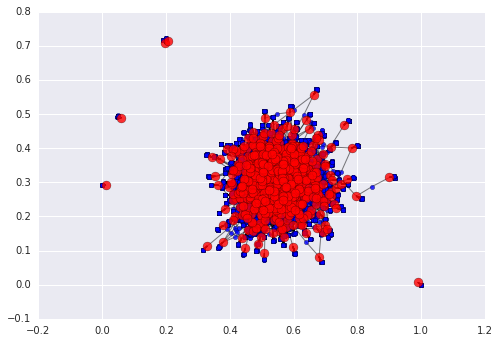

In [771]:
import matplotlib.pyplot as plt
#nx.draw_spectral(G,node_size=100)
#fruchterman_reingold_layout
pos=nx.fruchterman_reingold_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=User_nodes,
                       node_color='b',
                       node_size=20,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=Article_nodes,
                       node_color='r',
                       node_size=80,
                   alpha=0.8)

nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)

plt.show()

In [941]:
Num_nodes = len(G.nodes())
Num_edges = len(G.edges())
print "Number of nodes in the graph: %d"%Num_nodes
print "Number of edges in the graph: %d"%Num_edges

Number of nodes in the graph: 34123
Number of edges in the graph: 41030


### Degree of Graph

Lets start by looking at the degree of the different nodes

In [836]:
G_degree = nx.degree(G)

Finding the users with the highest degrees

In [838]:
for x in sorted(G_degree.items(), key=lambda x:x[1],reverse = True):
    if len(x[0]) >7: #Filtering all the articles out as they have a length that is less than seven
        print x

(u'1473975796259478', 39)
(u'808671592549761', 29)
(u'4858838845699', 29)
(u'10203621333307114', 26)
(u'613949675398411', 24)
(u'1152626974753806', 22)
(u'142394052866029', 20)
(u'10205223205253739', 20)
(u'172839516469889', 16)
(u'996794790361231', 16)
(u'10205364786873552', 15)
(u'583325288483136', 14)
(u'230954153779773', 14)
(u'1634738373430568', 13)
(u'688257644550703', 13)
(u'1637676589777745', 13)
(u'10151975332416135', 13)
(u'1165294346839399', 13)
(u'820188081343905', 13)
(u'1009142232445417', 13)
(u'10203530344204097', 13)
(u'687152618009684', 13)
(u'1550272941907489', 13)
(u'910809512264190', 12)
(u'440753802723249', 12)
(u'994451530569446', 12)
(u'389632401234306', 12)
(u'10201824013190002', 12)
(u'10204099054089703', 12)
(u'10152650378236293', 12)
(u'122368351556553', 12)
(u'1618203931760152', 12)
(u'1407373009568767', 12)
(u'10201936862643640', 11)
(u'620908954669842', 11)
(u'926356957418993', 11)
(u'10205287382646673', 11)
(u'941954419187221', 11)
(u'485372211597599', 11

Now lets look closer at the top five users:

In [840]:
top_5_users = ['1473975796259478','808671592549761','4858838845699','10203621333307114','613949675398411']

We want to see where the top five users comment

In [854]:
count = 1
for x in top_5_users:
    print "User number:%d"%count
    m = []
    for art in G[x]:
        m += re.findall('[A-Za-z]+',art)
    print Counter(m), len(m)
    print
    count +=1

User number:1
Counter({'WAP': 21, 'CNN': 8, 'NBC': 4, 'FOX': 4, 'CON': 2}) 39

User number:2
Counter({'WAP': 22, 'NBC': 5, 'CNN': 1, 'NYT': 1}) 29

User number:3
Counter({'CNN': 18, 'NBC': 11}) 29

User number:4
Counter({'WAP': 16, 'HUF': 9, 'NYT': 1}) 26

User number:5
Counter({'Br': 11, 'FOX': 6, 'CNN': 4, 'NBC': 3}) 24



Here we see which sites the top five commenters have commented on. While the the top commenter has mostly commented on the Washington Post, the person also has contributed to comments on CNN, MSNBC, Fox News, and the Conservative News Today, so this person has commented on mostly left leaning sites, but also on a few right wing sites. The next three users mostly have commented on left leaning sites, while the last person has mostly commented on right wing websites. 

### Degree distribution

Next we want to find out more by looking at the degree distribution of the network

In [286]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re

As we know that there are two different types of nodes, we need to distinguise between the two. However lets first look at the distribution of all the degrees in the network.

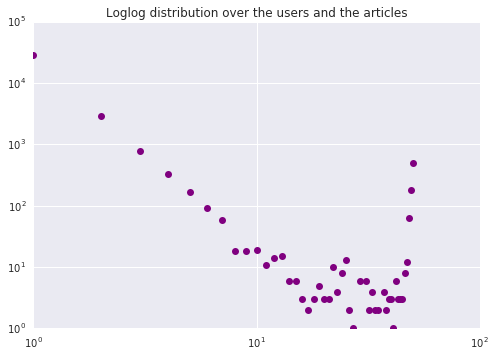

The average degree over the users and the articles are: 2.404830


In [936]:
Degree = nx.degree(G)
coutning_degree = Counter(Degree.values())
plt.loglog(coutning_degree.keys(),coutning_degree.values(),'o',color= 'purple')
plt.title('Loglog distribution over the users and the articles')
plt.show()
print('The average degree over the users and the articles are: %f'%np.mean(Degree.values()))

Here we can see the distribution of the users to he left and the posts to the right. To find out more we find where the degree of the two split

In [595]:
#Find the article with the lowest degree:
#Degree_articles = []
Lowest_degree = 100
Arcticle_degree = {}
User_degree = {}
for x in Degree:
    if len(x) < 7: #If something is wrong, play with this parameter
        #Degree_articles.append((x,Degree[x]))
        Arcticle_degree[x] = Degree[x]
        if Degree[x] < Lowest_degree:
            Lowest_degree = Degree[x]
            print x, Lowest_degree
    else:
        User_degree[x] = Degree[x]

Br98 50
HUF39 49
CNN33 48
CNN31 46
WAP63 8
CON17 3


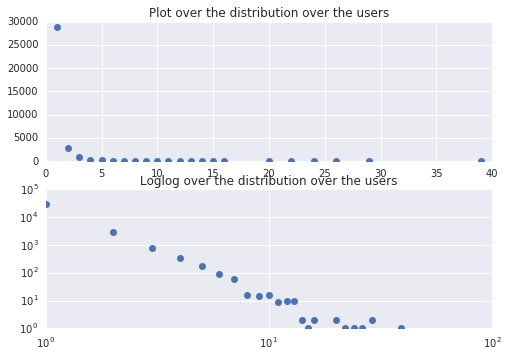

The average degree over the users and the articles are: 1.234988


In [597]:
Users_degree_count = Counter(User_degree.values())

plt.subplot(211)
plt.plot(Users_degree_count.keys(),Users_degree_count.values(),'o')
plt.title('Plot over the distribution over the users')

plt.subplot(212)
plt.loglog(Users_degree_count.keys(),Users_degree_count.values(),'o')
plt.title('Loglog over the distribution over the users')
plt.show()

print('The average degree over the users and the articles are: %f'%np.mean(User_degree.values()))

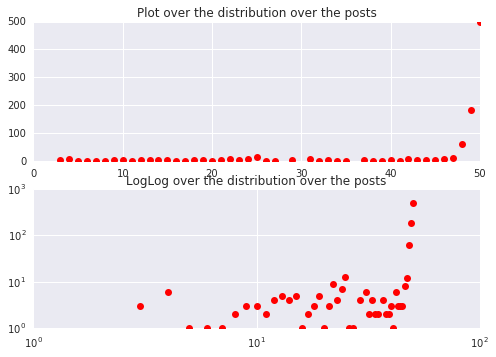

The average degree over the users and the articles are: 47.271429


In [598]:
Article_degree_count = Counter(Arcticle_degree.values())

plt.subplot(211)
plt.plot(Article_degree_count.keys(),Article_degree_count.values(),'o', color= 'r')
plt.title('Plot over the distribution over the posts')

plt.subplot(212)
plt.loglog(Article_degree_count.keys(),Article_degree_count.values(),'o', color= 'r')
plt.title('LogLog over the distribution over the posts')

plt.show()

print('The average degree over the users and the articles are: %f'%np.mean(Arcticle_dict.values()))

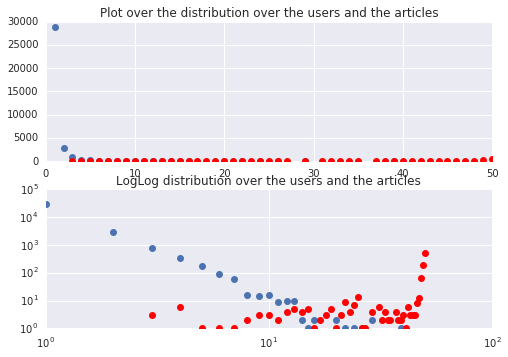

In [599]:
plt.subplot(211)
plt.plot(Users_degree_count.keys(),Users_degree_count.values(),'o')
plt.plot(Article_degree_count.keys(),Article_degree_count.values(),'o', color= 'r')
plt.title('Plot over the distribution over the users and the articles')

plt.subplot(212)
plt.loglog(Users_degree_count.keys(),Users_degree_count.values(),'o')
plt.loglog(Article_degree_count.keys(),Article_degree_count.values(),'o', color= 'r')
plt.title('LogLog distribution over the users and the articles')
plt.show()

### Centrality

We want to compute centrality for the graph to find important nodes, however we have a very large graph which makes it hard to compute, so we will use a subset of the graph to compute the betweenness centrality. We expect that the nodes with highest betweenness centrality scores are the ones that have commented on different Facebook pages.

In [948]:
bc = nx.betweenness_centrality(G,k=Num_nodes/20)

In [966]:
bc_sorted = sorted(bc.items(), key=lambda x:x[1],reverse = True)
print bc_sorted[:10]

[(u'1473975796259478', 0.06355737647214882), (u'613949675398411', 0.04725875609966453), (u'1152626974753806', 0.03822283456778271), (u'10203621333307114', 0.03340811038209025), (u'4858838845699', 0.02788209058721533), (u'301461333397970', 0.023300642749951094), (u'808671592549761', 0.022627051472784276), ('TOM37', 0.02066439393001235), ('FOX58', 0.016783039525101573), ('TOM24', 0.016235228823510795)]


In [969]:
print top_5_users

['1473975796259478', '808671592549761', '4858838845699', '10203621333307114', '613949675398411']


We can't get eigenvector centrality to work with 2000 iterations, the method does not converge for our problem.

In [ ]:
eig_central = nx.eigenvector_centrality(G,max_iter = 2000)

In [127]:
degree_assortativity =nx.degree_assortativity_coefficient(G)

In [267]:
print('The degree assortativity is %f'%degree_assortativity)

The degree assortativity is -0.963222


### Communities

We can define the communities in this problem what facebook page they come from, so the people that only comment on one page are in their own community. So to start off with we can put all the users with one degree into a community.

In [600]:
#First find all the keys
Communities = {}
for x in User_degree:
    m = []
    for i in G[x]:
        m += re.findall('[A-Za-z]+',i)
    
    m = list(set(m))
    if len(m) == 1:
        Communities[m[0]] = []
    else:
        Communities['Multi'] = []
    #for i in G[x]:
    #    m = re.findall('[A-Za-z]+',i)
    

In [601]:
for x in User_degree:
    m = []
    for i in G[x]:
        m += re.findall('[A-Za-z]+',i)
        
    m = list(set(m))
    if len(m) == 1:
        Communities[m[0]].append(x)
    else:
        Communities['Multi'].append(x)

How many users are that only uses one news source

In [602]:
temp = []
for x in Communities:
    temp.append(len(set(Communities[x])))
    print x, len(set(Communities[x]))
                
                
sum(temp)

Multi 1247
FOX 3866
HUF 3623
NYT 3131
NBC 3224
Br 3749
TOM 4330
CNN 3757
CON 3165
WAP 3131


33223

In [603]:
degrees_multi = []
for key in Communities:
    for x in Communities[key]:
        degrees_multi.append(len(G[x]))

    print('Average degree in the %s is:%f'%(key,np.mean(degrees_multi)))

Average degree in the Multi is:3.412189
Average degree in the FOX is:1.668688
Average degree in the HUF is:1.421131
Average degree in the NYT is:1.343052
Average degree in the NBC is:1.331257
Average degree in the Br is:1.301168
Average degree in the TOM is:1.263660
Average degree in the CNN is:1.243399
Average degree in the CON is:1.238801
Average degree in the WAP is:1.234988


In [604]:
Com_without_multi = Communities.copy()
Com_without_multi.pop('Multi', None)

for x in Communities['Multi']:
    m = []
    for article in G[x]:
        m += re.findall('[A-Za-z]+',article)
    count = Counter(m)
    max_comments = max(count, key=count.get)
    Com_without_multi[max_comments].append(x)

In [605]:
temp = []
for x in Com_without_multi:
    temp.append(len(set(Com_without_multi[x])))
    print x, len(set(Com_without_multi[x]))

FOX 4056
HUF 3713
NYT 3257
CNN 4006
Br 3904
TOM 4346
NBC 3487
WAP 3236
CON 3218


Number of people that have gone from the multi community to the other communities.

In [965]:
print 'FOX', 4056-3866
print 'HUF', 3713-3623
print 'NYT', 3257-3131
print 'NBC', 3487-3224
print 'Br', 3904-3749
print 'TOM', 4346-4330
print 'CNN', 4006-3757
print 'CON', 3218-3165
print 'WAP', 3236-3131

FOX 190
HUF 90
NYT 126
NBC 263
Br 155
TOM 16
CNN 249
CON 53
WAP 105


In [610]:
User_to_communities = {}
cat_num = 0 
for cat in Com_without_multi:
    for user in Com_without_multi[cat]:
        User_to_communities[user] = cat_num
    cat_num += 1

In [611]:
categories = {}
count = 0
for cat in Com_without_multi:
    categories[cat] = count
    count += 1
    
print categories

{'HUF': 1, 'FOX': 0, 'NYT': 2, 'NBC': 6, 'Br': 4, 'TOM': 5, 'CNN': 3, 'CON': 8, 'WAP': 7}


In [612]:
User_and_article_communities = User_to_communities.copy()
for x in Arcticle_degree:
    m = re.findall('[A-Za-z]+',x)
    User_and_article_communities[x] = categories[m[0]]

### Community

In [684]:
import community
part = community.best_partition(G,partition=User_and_article_communities)
print "Modularity for our model:", community.modularity(User_and_article_communities, G)
print "Louvian model: ", community.modularity(part, G)
community.induced_graph(part, G)
plt.show()

Modularity for our model: 0.846689439891
Louvian model:  0.846966988363


In [614]:
set(part.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [615]:
#part_com_as_keys = dict.fromkeys(list(set(part.values())),[]).copy()
part_com_as_keys = {}
for x in set(part.values()):
    part_com_as_keys[x] = []

for x in part:
    #print part[x], x
    part_key = part[x]
    part_com_as_keys[part_key].append(x)
    

In [616]:
#User_and_article_communities_com_as_keys = dict.fromkeys(list(set(part.values())),[]).copy()

User_and_article_communities_com_as_keys = {}
for x in set(part.values()):
    User_and_article_communities_com_as_keys[x] = []

for x in User_and_article_communities:
    User_and_article_communities_com_as_keys[User_and_article_communities[x]].append(x)

In [617]:
conf_matrix = []
for i in part_com_as_keys:
    part_i = []
    for j in User_and_article_communities_com_as_keys:
        count = len(set(part_com_as_keys[i]).intersection(set(User_and_article_communities_com_as_keys[j])))
        part_i.append(count)
        #print x, Us
    conf_matrix.append(part_i)

In [620]:
cat_list = sorted(categories.items(), key=lambda x:x[1],reverse = False)

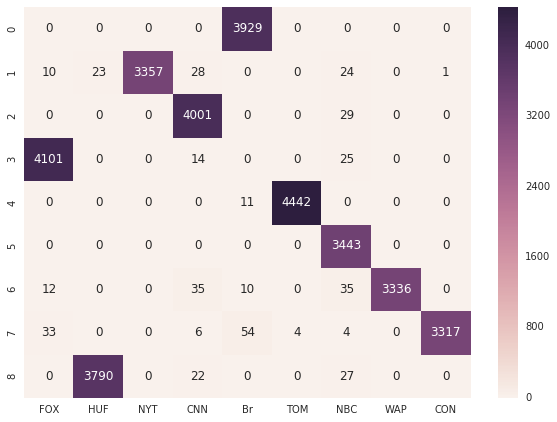

In [633]:
#plt.matshow(conf_matrix)
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(conf_matrix, index = [i for i in range(9)],
                  columns = [i[0] for i in cat_list])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt='d')
plt.show()

In [ ]:
We rearrage the 

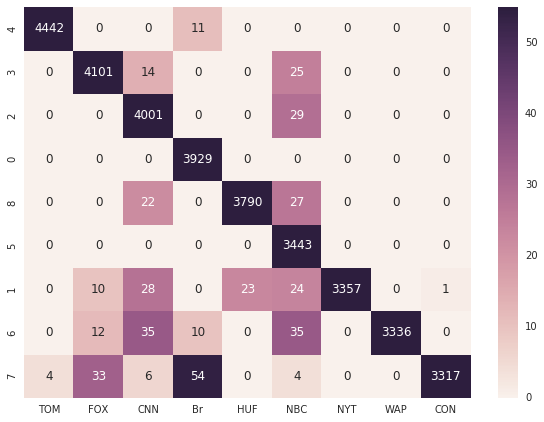

In [689]:
df_cm.index
t2 = df_cm.reindex([4,3,2,0,8,5,1,6,7]) 
cols = t2.columns.tolist()

cols = [cols[5]]+[cols[0]]+[cols[3]]+[cols[4]]+[cols[1]]+[cols[6]]+[cols[2]]+[cols[7]]+[cols[8]]

t2 = df_cm[cols]
t3 = t2.reindex([4,3,2,0,8,5,1,6,7]) 
plt.figure(figsize = (10,7))
sn.heatmap(t3, annot=True,fmt='d',vmin=0, vmax=55)
plt.show()

In group one the the other groups come from the fact that the multi groups have 'guessed' wrong, so for example we have that a user as commented on fox and nyt then it should have been in the nyt group and not the fox group. This is the same with cnn in group 2. Same in 3, 4 this is what happens every time. We rearrange for prettyness



In [641]:
categories

{'Br': 4,
 'CNN': 3,
 'CON': 8,
 'FOX': 0,
 'HUF': 1,
 'NBC': 6,
 'NYT': 2,
 'TOM': 5,
 'WAP': 7}

In [658]:
for x in set(part_com_as_keys[8]).intersection(set(User_and_article_communities_com_as_keys[1])):
    print G[x]
#User_and_article_communities_com_as_keys

{'HUF72': {}}
{'HUF28': {}}
{'HUF20': {}}
{'HUF54': {}}
{'HUF2': {}}
{'HUF25': {}}
{'HUF76': {}}
{'HUF65': {}}
{'HUF10': {}}
{'HUF22': {}}
{'HUF21': {}}
{'HUF12': {}, 'HUF74': {}}
{'HUF89': {}, 'HUF83': {}}
{'HUF72': {}, 'HUF89': {}}
{'HUF33': {}}
{'HUF19': {}}
{'HUF61': {}}
{'HUF54': {}, 'HUF52': {}}
{'HUF36': {}}
{'HUF89': {}}
{'HUF86': {}}
{'HUF76': {}}
{'HUF58': {}}
{'HUF96': {}}
{'HUF59': {}}
{'HUF2': {}}
{'HUF34': {}}
{'HUF57': {}}
{'HUF41': {}, 'HUF92': {}}
{'HUF7': {}}
{'HUF49': {}, 'HUF29': {}}
{'HUF41': {}}
{'HUF87': {}}
{'HUF71': {}, 'HUF99': {}}
{'HUF55': {}}
{'HUF60': {}}
{'HUF63': {}}
{'HUF53': {}}
{'HUF80': {}}
{'HUF11': {}}
{'HUF40': {}}
{'HUF46': {}}
{'HUF0': {}}
{'HUF76': {}}
{'HUF77': {}}
{'HUF49': {}}
{'HUF89': {}}
{'HUF77': {}}
{'HUF93': {}}
{'HUF22': {}}
{'HUF65': {}}
{'HUF74': {}}
{'HUF53': {}, 'HUF65': {}}
{'HUF51': {}}
{'HUF81': {}}
{'HUF92': {}}
{'HUF67': {}}
{'HUF53': {}}
{'CON52': {}, 'HUF66': {}, 'FOX87': {}}
{'HUF54': {}}
{'HUF7': {}}
{'HUF71': {}}
{'HUF2'

### NLP

In [692]:
import nltk
import io
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


#### Text dictionary

In [808]:
def Process_text(text):
    tmp = re.sub(r'[^a-zA-Z ]',r' ',text) #Remove evreything but words, space comma and period
    lower_tmp = tmp.lower()
    word_tmp = word_tokenize(lower_tmp)
    custom_stopwords = stopwords.words('english')
    no_stopwords = [x for x in word_tmp if x not in custom_stopwords]
    return no_stopwords

Creating  a dictionary where the key is the user or the article and the values are the corresponding texts.

In [826]:
#Defining all the keys
text_dict = {}
for x in G:
    text_dict[x] = {}

#Adding the text
for source in All_dict:
    count = 0
    current_dict = All_dict[source]
    for x in current_dict['data']:
        
        node_name = "%s%d"%(source,count)
        try: 
            text_dict[node_name].append(x['message'])
        except:
            pass
        for i in x['comments']['data']:
            user = i['from']['id']
            text_dict[user].append(i['message'])
            
        count += 1

In [827]:
for x in text_dict['Br0']:
    print x

REVEALED: A search of state election records was conducted by a Portland television station which reported that of the 112 protesters that were arrested, 69 of them could not be found to have turned in a ballot or were not registered to vote in the Beaver State.


### Sentiment analysis on The communities

In [898]:
conf_sent_matrix = []
for i in part_com_as_keys:
    part_i = []
    for j in User_and_article_communities_com_as_keys:
        count = set(part_com_as_keys[i]).intersection(set(User_and_article_communities_com_as_keys[j]))
        if len(count) > 0:
            for user in count:
                tmp = []
                m = 0
                for text in text_dict[user]:
                    sent = sentiment_profile(Process_text(text))
                    m = np.mean(sent)
                    tmp.append(m)
        else:
            tmp = [0]
        part_i.append(np.mean(tmp))
        #print x, Us
    conf_sent_matrix.append(part_i)

No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words with sentiment attached
No words w

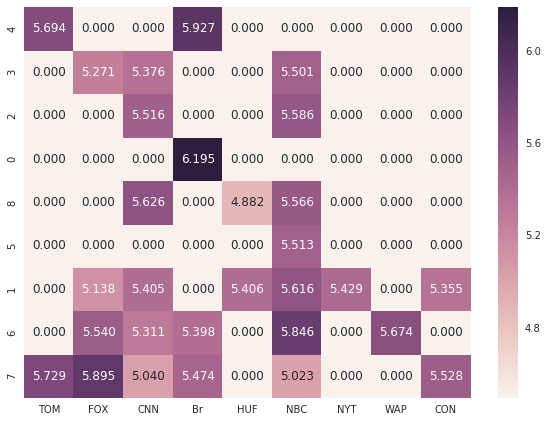

In [902]:

df_cm = pd.DataFrame(conf_sent_matrix, index = [i for i in range(9)],
                  columns = [i[0] for i in cat_list])
df_cm.index
t2 = df_cm.reindex([4,3,2,0,8,5,1,6,7]) 
cols = t2.columns.tolist()

cols = [cols[5]]+[cols[0]]+[cols[3]]+[cols[4]]+[cols[1]]+[cols[6]]+[cols[2]]+[cols[7]]+[cols[8]]

t2 = df_cm[cols]
t3 = t2.reindex([4,3,2,0,8,5,1,6,7]) 

plt.figure(figsize = (10,7))
sn.heatmap(t3, annot=True,fmt='.03f',vmin=4.5)
plt.show()



Printing the sentiment profile for the top five commenters.

In [923]:
tmp = []
user =top_5_users[-1] #'613949675398411'
for user in top_5_users: 

    for x in text_dict[user]:
        sent = sentiment_profile(Process_text(x))
        m = np.mean(sent)
        temp.append(tmp)
        #print x, m
    #print G[user]
    print np.mean(m)

5.44591836735
5.57198198198
5.7652173913
5.863
4.73230769231


### Tf-idf

In [928]:
import sklearn
tf = sklearn.feature_extraction.text.TfidfVectorizer(text)

In [929]:
print tf

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8',
        input=u"I never had to have an abortion thanks to the birth control that I bought on a sliding scale from Planned Parenthood. My medical exam, Pap smears, breast exams and blood pressure was all taken at Planned Parenthood until I could afford a private doctor. Planned Parenthood prevents pregnancies and maintains women's health. It is an important and essential agency for low income women. Oh and I'm white, btw. Planned parenthood is for all colors of the human rainbow.",
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)


In [861]:
text = ''
for x in text_dict[user]:
    text +=x

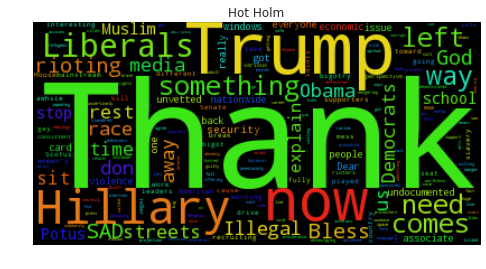

In [864]:
wordcloud = WordCloud().generate(text)
img=plt.imshow(wordcloud)
plt.title('Hot Holm')
plt.axis('off')
plt.show()

In [46]:
text_ex = []
for x in Breitbart_dict['data'][0]['comments']['data']:
    text_ex.append(x['message'])

In [715]:
test = text_ex[3]

In [716]:
tmp = re.sub(r'[^a-zA-Z ]',r' ',test) #Remove evreything but words, space comma and period
lower_tmp = tmp.lower()
word_tmp = word_tokenize(lower_tmp)
custom_stopwords = stopwords.words('english')
no_stopwords = [x for x in word_tmp if x not in custom_stopwords]

In [717]:
no_stopwords

[u'case',
 u'though',
 u'liberal',
 u'american',
 u'media',
 u'spewing',
 u'hate',
 u'look',
 u'looks',
 u'like',
 u'oligarchs',
 u'control',
 u'canadian',
 u'government',
 u'want',
 u'canadians',
 u'getting',
 u'idea',
 u'might',
 u'take',
 u'control',
 u'government',
 u'state',
 u'tv',
 u'broadcast',
 u'prime',
 u'news',
 u'loudly',
 u'forcefully',
 u'definitively',
 u'bannon',
 u'misogynist',
 u'racist',
 u'white',
 u'supremacist',
 u'new',
 u'web',
 u'site',
 u'outlet',
 u'antisemitism',
 u'extremist',
 u'ideology',
 u'cited',
 u'web',
 u'site',
 u'readers',
 u'group',
 u'neo',
 u'nazis',
 u'white',
 u'supremacists',
 u'wow',
 u'thought',
 u'talking',
 u'lol',
 u'intensity',
 u'media',
 u'propaganda',
 u'surreal',
 u'took',
 u'quick',
 u'look',
 u'english',
 u'language',
 u'newspapers',
 u'european',
 u'countries',
 u'today',
 u'found',
 u'obscene',
 u'propaganda',
 u'clearly',
 u'global',
 u'elite',
 u'give',
 u'control',
 u'us',
 u'gracefully',
 u'global',
 u'american',
 u'media'

In [711]:
Breitbart_dict['data'][0]['comments']['data'][0]['message']

u'Paid protestor or just plain stupid! Either way, arrest Soros for his paid employees are destroying property!'

In [41]:
len(Breitbart_dict['data'][0]['comments']['data'])

50

In [47]:
len(text_ex)

50

In [691]:
for x in text_ex:
    print x

I agree, "it's gotten to be the boy who cried wolf...". and I'll be honest, every time I hear racist something or other spouted by a person of color I just tune out. There are I am sure tens of thousands (including whites) who actually suffer from racism while the rest just try to cash in on it. In truth the word has lost all meaning to me and many other whites. Sorry, but that card has been played a few million times to many. while most of those using the term wouldn't know real racism if it bit them on the butt.
the establishment is doing everything they can to soften our movement. it's like we won but there holding us hostage bye calling us everything in the book. trying to make us feel like we're bad guyz for putting up with abuse for 8 years. hey we didn't like Obama but we didn't go burning down shit and beating people up. msm is a joke, treasonis jerks. #draintheswamp #buildthewall
Is it only me who does not for minute believe Trump supporters are doing hate crimes?  With all th

In [723]:
Breitbart_dict['data'][0].keys()

[u'picture',
 u'from',
 u'name',
 u'privacy',
 u'type',
 u'id',
 u'description',
 u'status_type',
 u'comments',
 u'updated_time',
 u'caption',
 u'application',
 u'link',
 u'likes',
 u'shares',
 u'created_time',
 u'is_hidden',
 u'is_expired',
 u'message',
 u'actions',
 u'icon']

In [739]:
Breitbart_dict['data'][9]['message']

KeyError: 'message'

In [720]:
NYT_dict

[u'paging', u'data']

In [754]:
def Process_text(dict_process): 
    text = ''
    count = 0
    for x in dict_process['data']:
        #print x['message']
        count += 1
        #print count 
        try: 
            text += x['message']
        except:
            pass
        for i in x['comments']['data']:
            text += ' '+i['message']
    
    return text

In [755]:
msnbc_text = Process_text(msnbc_dict)

In [768]:
def tokenize_word(text):
    tmp = re.sub(r'[^a-zA-Z ]',r' ',text) #Remove evreything but words, space comma and period
    lower_tmp = tmp.lower()
    word_tmp = word_tokenize(lower_tmp)
    custom_stopwords = stopwords.words('english')
    no_stopwords = [x for x in word_tmp if x not in custom_stopwords]
    return no_stopwords

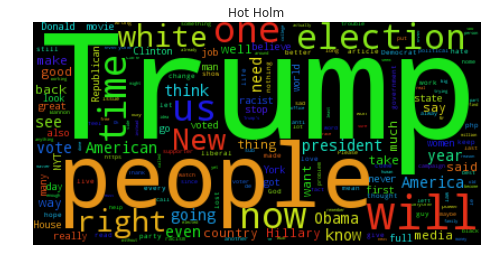

In [748]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(NYT_text)
img=plt.imshow(wordcloud)
plt.title('Hot Holm')
plt.axis('off')
plt.show()

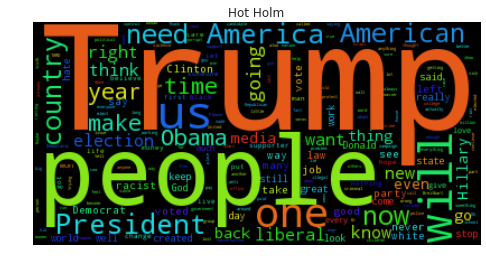

In [749]:
wordcloud = WordCloud().generate(Breitbart_text)
img=plt.imshow(wordcloud)
plt.title('Hot Holm')
plt.axis('off')
plt.show()

In [750]:
Tom_text = ''
count = 0
for x in Tomi_dict['data']:
    #print x['message']
    count += 1
    #print count 
    try: 
        Tom_text += x['message']
    except:
        pass
    for i in x['comments']['data']:
        Tom_text += ' '+i['message']
        

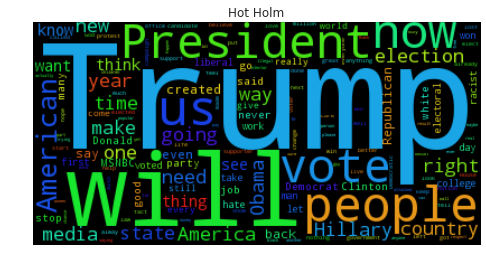

In [756]:
wordcloud = WordCloud().generate(msnbc_text)
img=plt.imshow(wordcloud)
plt.title('Hot Holm')
plt.axis('off')
plt.show()

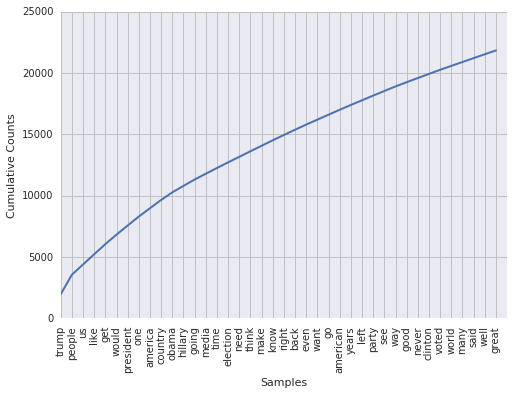

In [758]:
fdist = FreqDist(no_stopwords)
fdist.plot(40, cumulative=True)

### Sentiment Analysis

In [762]:
file = open("Data_Set_S1.txt",'r')
sentiment_table = [row.strip().split('\t') for row in file]

In [763]:
info = sentiment_table[3]
print info
print '\n'
print sentiment_table[5]
sentiment = {row[0] : {info[1] : row[1], info[2] : row[2], info[3] : row[3], info[4] : row[4], info[5] : row[5], info[6] : row[6], info[7] : row[7]} for row in sentiment_table[4:]}

['word', 'happiness_rank', 'happiness_average', 'happiness_standard_deviation', 'twitter_rank', 'google_rank', 'nyt_rank', 'lyrics_rank']


['happiness', '2', '8.44', '0.9723', '1853', '2458', '--', '1230']


In [816]:
def sentiment_profile(tokens):
    happiness_list = []
    for word in tokens:  
        if word in sentiment:
            happiness_list.append(float(sentiment[word]['happiness_average']))

    if len(happiness_list) == 0:
        print "No words with sentiment attached"
        return 0
    else:
        sentiment_profile = np.mean(happiness_list)
        #print "%d of %d words have sentiment attached"%(len(happiness_list), len(tokens))
        return happiness_list#sentiment_profile

In [766]:
sent = sentiment_profile(no_stopwords)

115273 of 135802 words have sentiment attached


In [956]:
sentiment['sad']

{'google_rank': '3579',
 'happiness_average': '2.38',
 'happiness_rank': '10091',
 'happiness_standard_deviation': '1.6149',
 'lyrics_rank': '526',
 'nyt_rank': '3441',
 'twitter_rank': '306'}

In [770]:
np.mean(sentiment_profile(tokenize_word(msnbc_text)))

137365 of 161030 words have sentiment attached


5.5246436137298431